# <center> DENİZ BALCI SİMÜLASYON 3.ÖDEVİ</center>

# 1)  Paket Kurulumu ve Ön açıklama

Bütün hücreleri ayrı ayrı veya bütün halde çalıştırabilirsiniz.İlk olarak paketleri yükleyelim.

In [1]:
!pip install scipy
!pip install numpy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


## SORU 1




 \begin{equation}
 f(x) =
   \left\{\begin{array}{lr}
      \frac{3}{4}(1-x^2)  & -1 < x < 1 \\
     0 & dd
    \end{array}\right.
 \end{equation}
 
 Kabul red yöntemi ile 
<ol style="list-style-type: lower-alpha;">
  <li>Ortalama </li>
  <li>Varyans,standart sapma</li>
<li>P(X< 0 ) </li>
</ol> 
Değerlerini bulunuz.

# <center>ANAKÜTLE ÖZELLİKLERİ </center>

 \begin{equation}
 f(x) =
   \left\{\begin{array}{lr}
      \frac{3}{4}(1-x^2)  & -1 < x < 1 \\
     0 & dd
    \end{array}\right.
 \end{equation}
 
 \begin{equation}
 F(x) =
   \left\{\begin{array}{lr}
      \frac{3x-x^3-2}{4}  & -1 < x < 1 
    \end{array}\right.
 \end{equation}

 E(X)=0 
 
 Var(x)=1/5=0.2



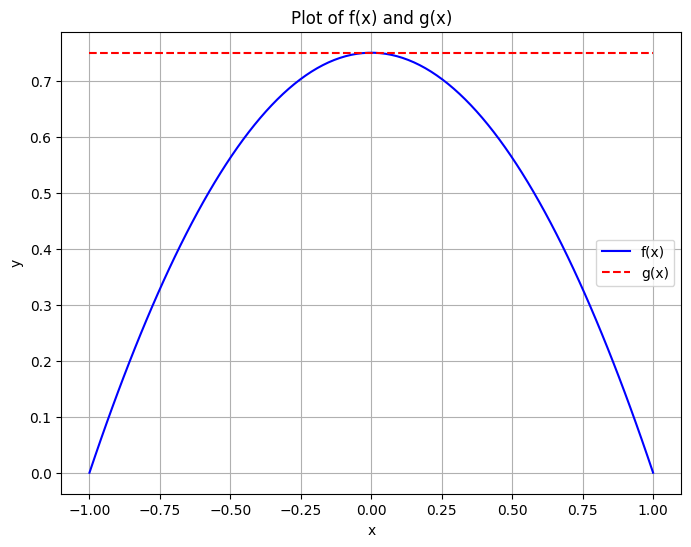

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define f(x) and g(x)
def f(x):
    return (3/4) * (1 - (x**2))

def g(x):
    return np.full_like(x, 3/4)  # Return an array with the same shape as x filled with 3/4

# Generate x values
x_values = np.linspace(-1, 1, 100)

# Calculate y values for f(x) and g(x)
f_values = f(x_values)
g_values = g(x_values)

# Plot both functions
plt.figure(figsize=(8, 6))
plt.plot(x_values, f_values, label='f(x)', color='blue')
plt.plot(x_values, g_values, label='g(x)', linestyle='--', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of f(x) and g(x)')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Define f(x) and g(x)
import numpy as np
def f(x):
    return (3/4) * (1 - (x**2))

def g(x):
    return 3/4  # Return an array with the same shape as x filled with 3/4

def find_c(N):
    datasett = np.random.uniform(-1, 1, N)
    generated_values = []
    for i in datasett:
        valuee = f(i) / g(i)
        generated_values.append(valuee)
        
    return np.max(generated_values)



def AR(N, lambdaa):
    x = np.array([])
    Y = np.random.exponential(lambdaa, 1)
    U1 = np.random.uniform(0, 1, 1)
    c=find_c(N)
    for i in range(N):
        while True:
            Y = np.random.exponential(lambdaa, 1)
            U2 = np.random.uniform(0, 1, 1)
            if U2 <= f(Y) / (c * g(Y)):
                x = np.append(x, Y)
                break
                
     
    
    
    
print("gercek ortalama ve varyans =1 alphaxbeta ile alphaxbeta^2 ")
print(AR(1000,1))



gercek ortalama ve varyans =1 alphaxbeta ile alphaxbeta^2 
None


## SORU 2
Gamma dağılımını 
g1(x)=üstel(1),g2=üstel(2)  fonksiyonlarını kabul red yöntemi ile karşılaştırınız.



 \begin{equation}
gamma f(x) =
   \left\{\begin{array}{lr}
      \frac{1}{\Gamma{(\alpha)}\beta^\alpha}e^{-x/ \beta} x^{\alpha -1} & x>0,\alpha>0,\beta>0 \\
     0 & dd
    \end{array}\right.
 \end{equation}
 
  \begin{equation}
üstel f(x) =
   \left\{\begin{array}{lr}
      \frac{1}{\lambda}e^{-x/ \lambda } & x>0 \\
     0 & dd
    \end{array}\right.
 \end{equation}
 
 

In [30]:
import numpy as np
from scipy.special import gamma, factorial

def exponential_dist(x,lambdaa):
    if x > 0:
        return (1/ lambdaa)*np.exp(-x/ lambdaa)
    else:
        return 0
    
#print(exponential(0,1))

def gamma_dist(x,alpha,beta):
    return (1 / gamma(alpha)*(beta ** alpha))*np.exp(-x/beta)*(x**(alpha-1))
    
    
#print(gamma_dist(0,1,1))

def find_c(N, lambdaa):
    datasett = np.random.uniform(0, 1, N)
    generated_values = []
    for i in datasett:
        valuee = exponential_dist(i, lambdaa) / gamma_dist(i,1,1)
        generated_values.append(valuee)
        
    return np.max(generated_values)



def AR(N, lambdaa,alpha,beta):
    x = np.array([])
    Y = np.random.uniform(-1, 1, 1)
    U = np.random.uniform(0, 1, 1)
    c=find_c(N, lambdaa)
    for i in range(N):
        while True:
            Y = np.random.uniform(-1, 1, 1)
            U = np.random.uniform(0, 1, 1)
            if U <= exponential_dist(Y, lambdaa) / (c * gamma_dist(Y,alpha,beta)):
                x = np.append(x, Y)
                break
    return x  

print("gercek ortalama ve varyans =1 alphaxbeta ile alphaxbeta^2 ")
print(np.mean(AR(1000,1,1,1)))
print(np.var(AR(1000,1,1,1)))



gercek ortalama ve varyans =1 alphaxbeta ile alphaxbeta^2 
0.5128822839803421
0.0854935633630393


In [32]:
import numpy as np

# Define g(x)
def g(x):
    return 3/4

# Define the constant c to normalize g(x) to make it a PDF
c = 3/2

# Generate a random number between 0 and 1
def generate_U1():
    return np.random.uniform(0, 1)

# Generate W using U_1
def generate_W():
    U_1 = generate_U1()
    W = -1 + 2 * U_1
    return W

# Generate f(x) using W
def generate_f(W):
    return (3/4) * (1 - W**2)

# Acceptance-rejection sampling loop
def accept_reject():
    while True:
        W = generate_W()
        U_2 = generate_U1()
        f = generate_f(W)
        if U_2 * (3/4) <= f:
            return W

# Test the accept_reject function
num_samples = 1000
accepted_samples = [accept_reject() for _ in range(num_samples)]

# Print some statistics
print("Acceptance rate:", len(accepted_samples) / num_samples)


Acceptance rate: 1.0
